In [2]:
train <- read.csv("Credit_train.csv")
test <- read.csv("Credit_test.csv")

In [3]:
install.packages("OneR")
install.packages("caret")
install.packages("e1071")
install.packages("AUC")
install.packages("rpart")
install.packages("rpart.plot")
library(OneR)
library(caret)
library(e1071)
library(AUC)
library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: ggplot2

AUC 0.3.0

Type AUCNews() to see the change log and ?AUC to get an overview.


Attaching package: ‘AUC’


The following objects are masked from ‘package:caret’:

    sensitivity, specificity





    Attribute   Accuracy
1 * DAYSDELQ    91.67%  
2   BUSAGE      91.39%  
2   BUSTYPE     91.39%  
2   MAXLINEUTIL 91.39%  
2   TOTACBAL    91.39%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'


Confusion matrix (absolute):
          Actual
Prediction    N    Y  Sum
       N   4286  391 4677
       Y     11   18   29
       Sum 4297  409 4706

Confusion matrix (relative):
          Actual
Prediction    N    Y  Sum
       N   0.91 0.08 0.99
       Y   0.00 0.00 0.01
       Sum 0.91 0.09 1.00

Accuracy:
0.9146 (4304/4706)

Error rate:
0.0854 (402/4706)

Error rate reduction (vs. base rate):
0.0171 (p-value = 0.3707)



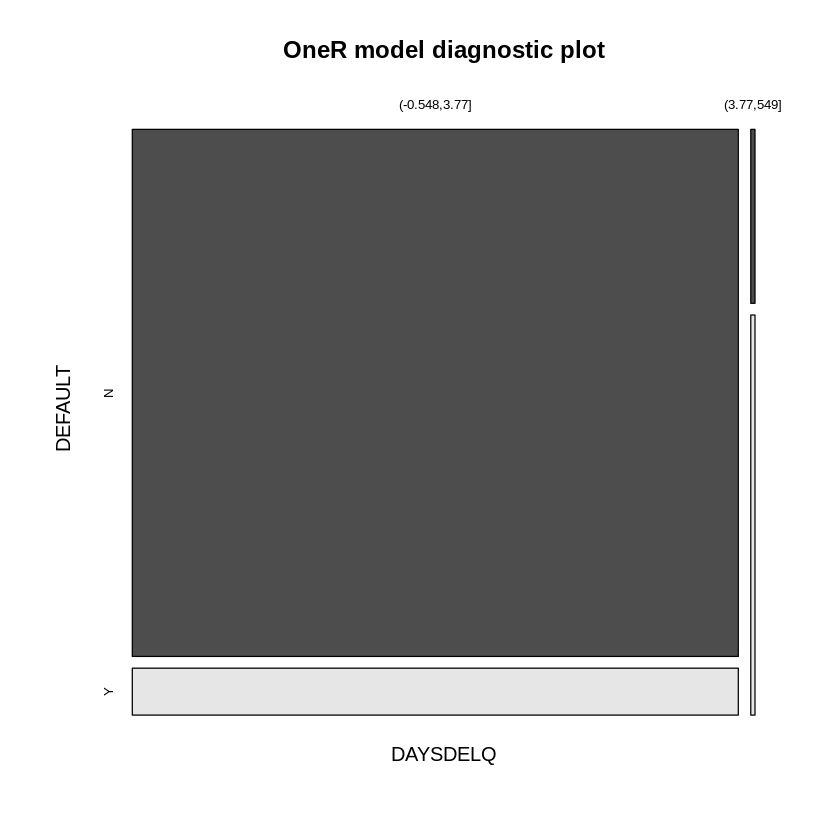

In [4]:
train <- na.omit(train)
test <- na.omit(test)

train.bin <- optbin(train)


model.OneR <- OneR(DEFAULT~., data = train.bin, verbose = TRUE)
plot(model.OneR)

pred <- predict(model.OneR, test, type = "class")
eval_model(pred,test)

In [5]:
#Question 5

sensitivity = 18/409
print(sensitivity)

[1] 0.04400978


In [6]:
# Question 6
Px = .5
Pc = .4
Pxc = .1
Pcx = (Pxc*Pc)/Px
print(Pcx)

[1] 0.08


In [7]:
#Question 7

a = 15
b = 10
c = 394
d = 4287

accuracy = (a+d)/(a+b+c+d)
sensitivity = a/(a+c)

print(accuracy)
print(sensitivity)

[1] 0.9141521
[1] 0.03667482


[1] 0.6960101

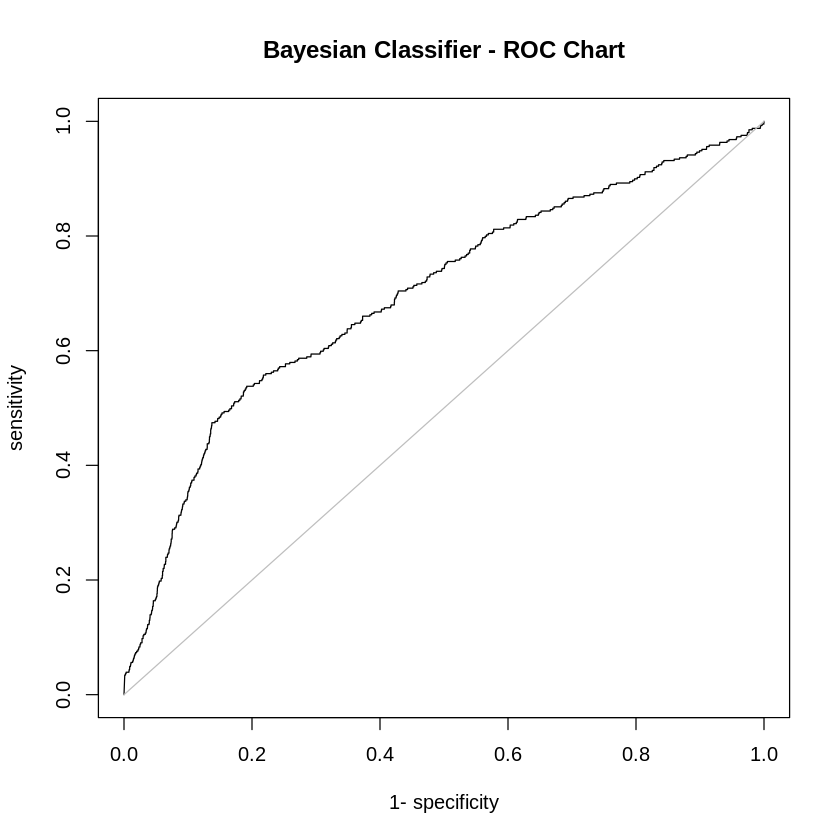

In [8]:
model.Bayes <- naiveBayes(DEFAULT~., data = train)

pb <-NULL
pb <- predict(model.Bayes, test, type = "raw")
pb <- as.data.frame(pb)

pred.Bayes <- data.frame(test$DEFAULT,pb$Y)
colnames(pred.Bayes) <- c("target","score")
labels <- as.factor(ifelse(pred.Bayes$target=="Y", 1, 0))

predictions <- pred.Bayes$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="Bayesian Classifier - ROC Chart")

In [9]:
#Question 10
a=17
b=5
c=392
d=4292
accuracy = (a+d)/(a+b+c+d)
sensitivity = a/(a+c)

print(accuracy)
print(sensitivity)

[1] 0.9156396
[1] 0.04156479


      pc           
 Length:4706       
 Class :character  
 Mode  :character  

Confusion Matrix and Statistics

   
pc     N    Y
  N 4292  392
  Y    5   17
                                          
               Accuracy : 0.9156          
                 95% CI : (0.9073, 0.9234)
    No Information Rate : 0.9131          
    P-Value [Acc > NIR] : 0.2774          
                                          
                  Kappa : 0.0706          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.041565        
            Specificity : 0.998836        
         Pos Pred Value : 0.772727        
         Neg Pred Value : 0.916311        
             Prevalence : 0.086910        
         Detection Rate : 0.003612        
   Detection Prevalence : 0.004675        
      Balanced Accuracy : 0.520201        
                                          
       'Positive' Class : Y               
                                          

[1] 0.654247

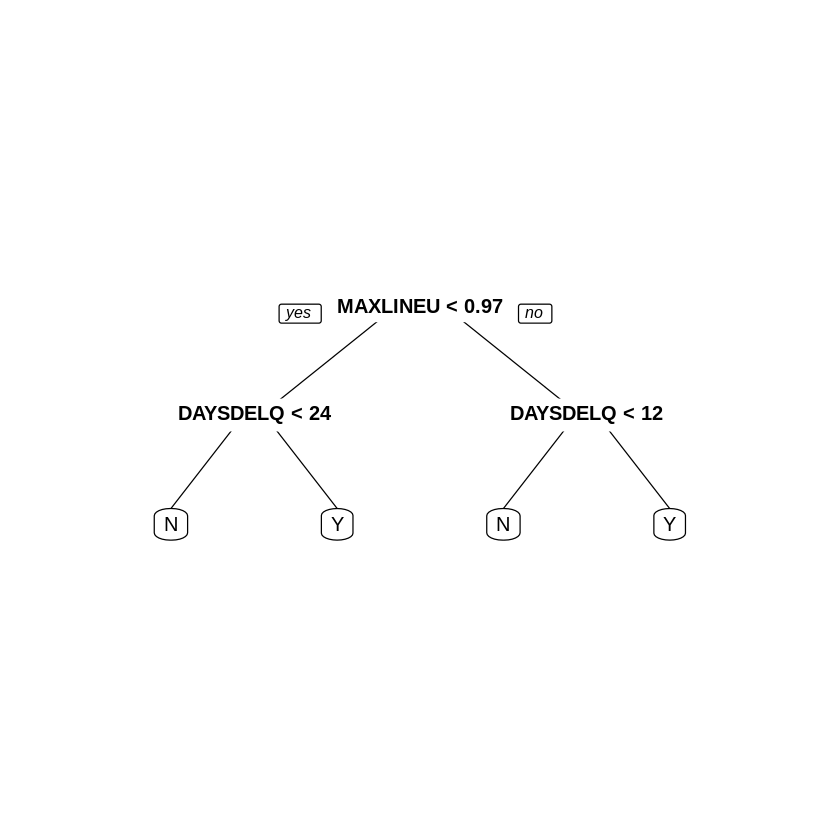

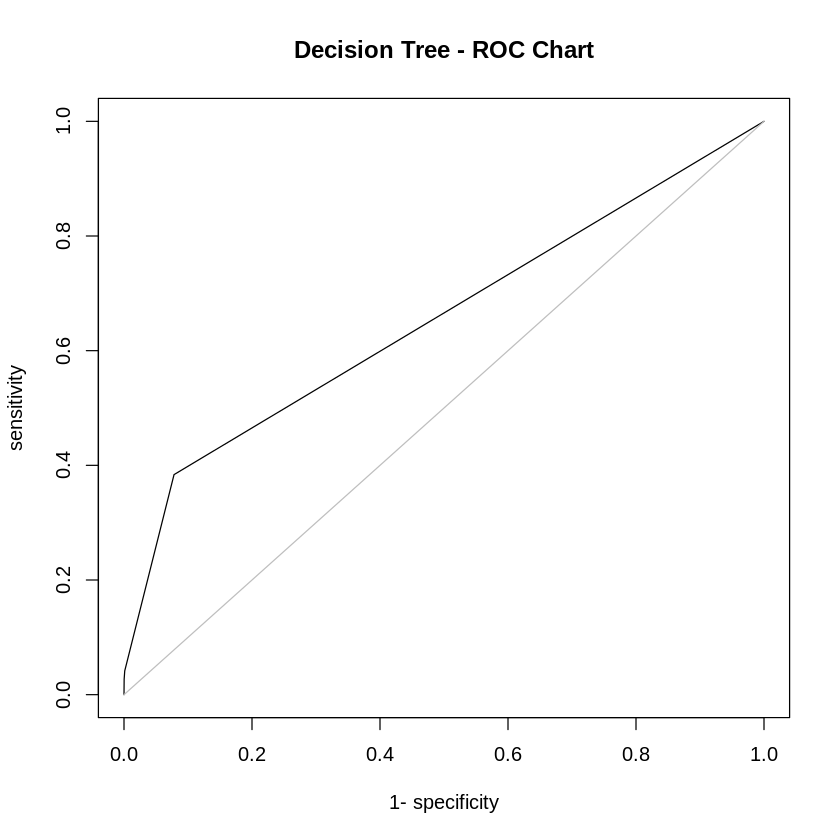

In [10]:
#Question 11

model.Dtree <- rpart(DEFAULT~., data = train, method="class")
prp(model.Dtree)

pb <- NULL
pb <- predict(model.Dtree, test)
pb <- as.data.frame(pb)
pred.Dtree <- data.frame(test$DEFAULT, pb$Y)
colnames(pred.Dtree) <- c("target","score")

pc <- NULL
pc <- ifelse(pb$N > pb$Y, "N", "Y")
summary(as.data.frame(pc))
xtab <- table(pc, test$DEFAULT)
caret::confusionMatrix(xtab, positive = "Y")

labels <- as.factor(ifelse(pred.Dtree$target=="Y", 1, 0))
predictions <- pred.Dtree$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="Decision Tree - ROC Chart")

In [11]:
#Question 12-15

Entropy <- function(a) {
  x = a/sum(a)
 return(sum(-x*log2(x)))
}
Twotropy <- function(a,b) {
  e1 = Entropy(a)
  e2 = Entropy(b)
  p1 = sum(a)/sum(a,b)
  p2 = sum(b)/sum(a,b)
  return(p1*e1+p2*e2)
}
Et = Entropy(c(17373,1636))
Etv = Twotropy(c(17193,180),c(1520,116))
print(Et)
print(Twotropy(c(10543, 4243, 1082, 1439, 17, 49),c(994, 434, 77, 124, 1, 6)))
print(Etv)
print(Et-Etv)

[1] 0.4231954
[1] 1.510929
[1] 0.1078006
[1] 0.3153948
